<a href="https://colab.research.google.com/github/ParkHYW/ApiProject/blob/main/Secom%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# to avoid warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [68]:
import os
path = os.getcwd()
print(path)

/content


In [69]:
data = pd.read_csv('uci-secom.csv')

In [70]:
data = data.rename({"Pass/Fail":'Pass_Fail'},axis=1)

### Data Cleaning

In [71]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

display(summary(data).sort_values(by='Nulls', ascending=False))

Data shape: (1567, 592)
___________________________
Data Types:
float64    590
int64        1
object       1
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
292,float64,138,93,1429,0.0041,0.0831
158,float64,138,139,1429,234.0996,2505.2998
157,float64,138,129,1429,0.0118,0.2876
293,float64,138,139,1429,82.3233,879.226
358,float64,226,21,1341,0.0017,0.0047
...,...,...,...,...,...,...
429,float64,1567,1542,0,0.7837,186.6164
250,float64,1567,1566,0,21.0107,1119.7042
251,float64,1567,143,0,0.0003,0.9909
252,float64,1567,1533,0,0.7673,2549.9885


# Time 삭제 


## Missing Values:결측치 처리
## 결측치가 50% 이상인 columns 삭제

In [72]:
def null_values(df):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

In [76]:
df_na_total = null_values(data)
df_na_total

,Missing_Records,Percentage (%)
292,1429,91.193363
293,1429,91.193363
157,1429,91.193363
158,1429,91.193363
358,1341,85.577537
...,...,...
456,1,0.063816
218,1,0.063816
356,1,0.063816
457,1,0.063816


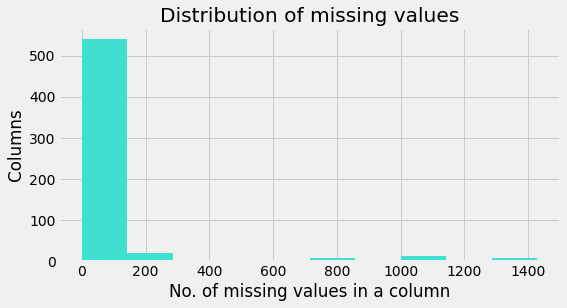

In [81]:
total_null = data.isnull().sum()
plt.figure(figsize = (8,4))
plt.hist(total_null, color='turquoise')
plt.title("Distribution of missing values")
plt.xlabel("No. of missing values in a column")
plt.ylabel("Columns")
plt.show()

In [82]:
df_na = df_na_total[df_na_total["Percentage (%)"] > 50] # 결측치가 50% 이상인 column을 삭제한다. 
df_na

,Missing_Records,Percentage (%)
292,1429,91.193363
293,1429,91.193363
157,1429,91.193363
158,1429,91.193363
358,1341,85.577537
85,1341,85.577537
492,1341,85.577537
220,1341,85.577537
518,1018,64.964901
246,1018,64.964901


## 결측치 채우기

In [83]:
#strategy 1: latest information available
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
data

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass_Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,208.2045,0.5005,0.0118,0.0035,2.3630,0.0096,0.0201,0.0060,208.2045,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,73.8432,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,203.1720,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4333,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [84]:
null_values(data)# null 값이 있는 지 확인한다.

,Missing_Records,Percentage (%)


In [85]:
data.shape

(1567, 592)

## Unique values in columns

In [86]:
data["5"].nunique()


1

In [87]:
def unique_columns(df):
    """a function to show unique columns with column name"""
    uni_col_list = []
    for column in df.columns:
        if df[column].nunique() == 1:
            uni_col_list.append(column)
    return uni_col_list

In [88]:

len(unique_columns(data))

116

##There are 116 columns that contain unique values. These columns must be removed

In [89]:

data["179"].nunique()


1

In [90]:
data.shape


(1567, 592)

In [91]:

data = data.drop(axis=1, columns=unique_columns(data))
data.shape

(1567, 476)

## Time 삭제하는 데에 대한 근거 필요

In [92]:
# We will not use the "Time" column in the following steps, so this column can be completely deleted.
data.drop(columns="Time", axis=1, inplace=True)
data.shape

(1567, 475)

In [93]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 475 entries, 0 to Pass_Fail
dtypes: float64(474), int64(1)
memory usage: 5.7 MB


## EDA (Exploratory Data Analysis)¶


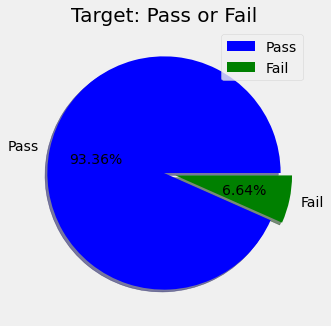

-1    1463
 1     104
Name: Pass_Fail, dtype: int64

In [94]:
# pie chart
# We have highly imbalanced class with only 6.6% failures and 93.4% pass

plt.rcParams['figure.figsize'] = (5,5)
labels = ['Pass', 'Fail']
size = data['Pass_Fail'].value_counts()
colors = ['blue', 'green']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()
data["Pass_Fail"].value_counts()

### Class Imbalance 문제 해결하기

In [95]:
data.corr()["Pass_Fail"].sort_values()

28          -0.107685
316         -0.089071
125         -0.083460
26          -0.082052
180         -0.078530
               ...   
348          0.129593
510          0.131574
103          0.149118
59           0.155991
Pass_Fail    1.000000
Name: Pass_Fail, Length: 475, dtype: float64

## 어떤 column 도 Pass_Fail과 correlation 없음

## highly collinear feature 해결하기

In [101]:
feature=data.drop("Pass_Fail",1)
y=data["Pass_Fail"]
col=list(feature.columns)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_feature = scaler.fit_transform(feature)
scaled_feature = pd.DataFrame(scaled_feature,columns=col)


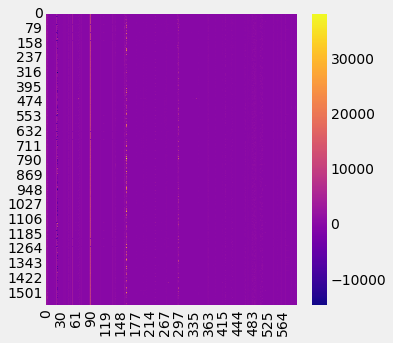

In [105]:
sns.heatmap(data,cmap='plasma')

Cumulative Variance Explained [  5.56510205+0.00000000e+00j   9.36352071+0.00000000e+00j
  12.93441884+0.00000000e+00j  16.00594522+0.00000000e+00j
  18.61403624+0.00000000e+00j  20.9773758 +0.00000000e+00j
  23.2352664 +0.00000000e+00j  25.33907537+0.00000000e+00j
  27.39336673+0.00000000e+00j  29.38882865+0.00000000e+00j
  31.2003421 +0.00000000e+00j  32.92231885+0.00000000e+00j
  34.62667162+0.00000000e+00j  36.30055697+0.00000000e+00j
  37.81159672+0.00000000e+00j  39.30953084+0.00000000e+00j
  40.77271891+0.00000000e+00j  42.17395035+0.00000000e+00j
  43.49959262+0.00000000e+00j  44.79010958+0.00000000e+00j
  46.03098466+0.00000000e+00j  47.24982403+0.00000000e+00j
  48.42981532+0.00000000e+00j  49.54634761+0.00000000e+00j
  50.6387187 +0.00000000e+00j  51.70769935+0.00000000e+00j
  52.73167139+0.00000000e+00j  53.72794667+0.00000000e+00j
  54.70469416+0.00000000e+00j  55.67723866+0.00000000e+00j
  56.59728868+0.00000000e+00j  57.49139761+0.00000000e+00j
  58.37493266+0.00000000e+